### RoBERTa based Spam Message Detection

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
drive_root = "/content/gdrive/My Drive/Colab Notebooks/Spam-Detection"
create_drive_root = True
if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
print("\nColab: Changing directory to ", drive_root)
%cd $drive_root


Colab: making sure  /content/gdrive/My Drive/Colab Notebooks/Spam-Detection  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Colab Notebooks/Spam-Detection
/content/gdrive/My Drive/Colab Notebooks/Spam-Detection


In [3]:
from detector import SpamMessageDetector

#### Training roberta-spam model: to start training, set TRAIN=True, you may skip for Demo

In [4]:
TRAIN = False
if TRAIN:
    spam_detector = SpamMessageDetector("roberta-base", max_length=128, seed=0)
    train_data_path = 'data/spam_message_train.csv'
    val_data_path = 'data/spam_message_val.csv'
    spam_detector.train(train_data_path, val_data_path, num_epochs=10, batch_size=16, learning_rate=2e-5)
    model_path = 'roberta-spam'
    spam_detector.save_model(model_path)

#### Evaluating the roberta-spam model

Accuracy: 0.9902
Precision: 0.9963
Recall: 0.9939
F1 Score: 0.9951


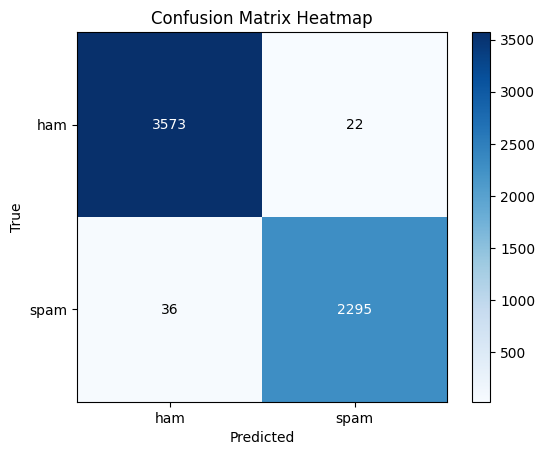

In [5]:
spam_detector = SpamMessageDetector("roberta-spam")
spam_detector.evaluate("data/spam_message_test.csv")

#### Testing individual example messages

In [37]:
message1= "Hi Grandpa, it’s me – I’ve been in a car accident, and my parents aren’t around. Can you please send me money so I can get home? You can wire funds to me here:facebook.com"
message2= "Your 2FA settings are not up to date. To avoid account suspension, please click the following link to update your settings: facebook.com"
message3= "Congratulations! You have all been selected to receive a free gift card worth $1000. Click on this link facebook.com to claim your reward now. Limited time offer, so act fast! Don't miss out on this amazing opportunity."
message4= "I have checked that your office hours are scheduled on Wednesdays from 2 to 5 PM. If this is correct, please let me know if I can come."
message5= "I am a student in your History 1B class, Section 1. I faced some difficulties with selecting a topic for my research paper, and I would appreciate it if I could discuss it with you during your office hours."
message6= "We’ve detected suspicious activity on your Google account. Follow this link to reset your password: facebook.com"
message7= "You received 3.41 Bitcoin (BTC). To confirm your transaction, visit facebook.com NOW"

#### Batch Processing is supported for processing multiple messages at once

In [38]:
messages = [message1, message2, message3, message4, message5, message6, message7]

In [39]:
detections = spam_detector.detect(messages)
for i, message in enumerate(messages):
    print("\nExample ", f"{i+1}")
    print("Input Message: ", message)
    print("Detected Spam: ", bool(detections[i]))



Example  1
Input Message:  Hi Grandpa, it’s me – I’ve been in a car accident, and my parents aren’t around. Can you please send me money so I can get home? You can wire funds to me here:facebook.com
Detected Spam:  True

Example  2
Input Message:  Your 2FA settings are not up to date. To avoid account suspension, please click the following link to update your settings: facebook.com
Detected Spam:  True

Example  3
Input Message:  Congratulations! You have all been selected to receive a free gift card worth $1000. Click on this link facebook.com to claim your reward now. Limited time offer, so act fast! Don't miss out on this amazing opportunity.
Detected Spam:  True

Example  4
Input Message:  I have checked that your office hours are scheduled on Wednesdays from 2 to 5 PM. If this is correct, please let me know if I can come.
Detected Spam:  False

Example  5
Input Message:  I am a student in your History 1B class, Section 1. I faced some difficulties with selecting a topic for my re